## Dataset 
#### Fruits

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

## Create image data generator objects

In [5]:
train_datagen= ImageDataGenerator(rescale = 1/255,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255)

## Read Images

In [8]:
train = train_datagen.flow_from_directory('Datasets/fruits/training_set',
                                         target_size = (64, 64),
                                         class_mode = 'binary')
train.filenames

Found 13 images belonging to 2 classes.


['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpeg',
 'apple\\4.jpeg',
 'apple\\5.jpg',
 'apple\\6.jpg',
 'apple\\7.jpg',
 'orange\\1.jpeg',
 'orange\\2.jpg',
 'orange\\3.jpeg',
 'orange\\4.jpeg',
 'orange\\5.jpg',
 'orange\\6.jpg']

In [33]:
print(train.classes)
print(train.class_indices)

[0 0 0 0 0 0 0 1 1 1 1 1 1]
{'apple': 0, 'orange': 1}


In [21]:
test = train_datagen.flow_from_directory('Datasets/fruits/test_set',
                                         target_size = (64, 64),
                                         class_mode = 'binary')
test.filenames

Found 6 images belonging to 2 classes.


['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpg',
 'orange\\1.jpg',
 'orange\\2.jpg',
 'orange\\3.jpg']

In [34]:
print(test.classes)
print(test.class_indices)

[0 0 0 1 1 1]
{'apple': 0, 'orange': 1}


## Visualize data

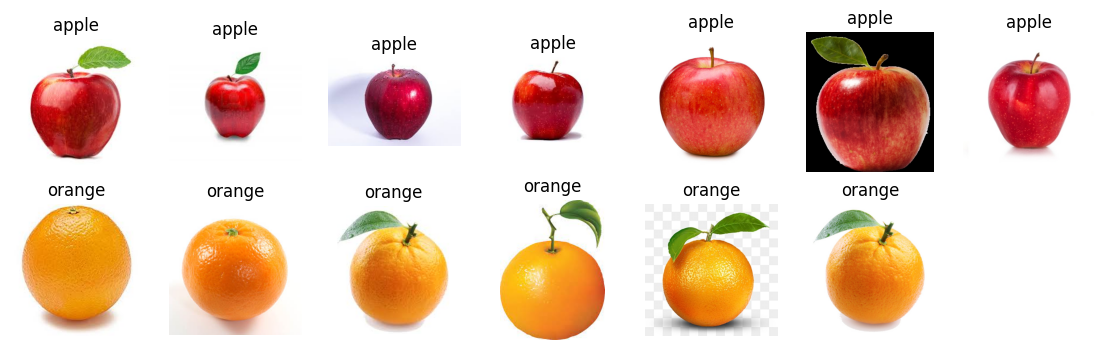

In [25]:
plt.figure(figsize = (14,4))
for i,fname in enumerate(train.filenames):
    img = plt.imread(train.directory+'/'+fname)
    plt.subplot(2,7,i+1)
    plt.imshow(img)
    plt.title(fname.split('\\')[0])
    plt.axis('off')

## Build Model

In [36]:
model = Sequential()
model.add(Conv2D(filters = 16,
                 kernel_size = (3,3),
                 input_shape = (64,64,3),
                 activation = 'relu')) ##62*62*16
model.add(MaxPool2D(pool_size = (2,2))) ##31*31*16

model.add(Conv2D(filters = 8,
                 kernel_size = (3,3),
                 activation = 'relu')) ##29*29*8
model.add(MaxPool2D(pool_size = (2,2))) ##14*14*8

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [37]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

history = model.fit(train, epochs = 20, validation_data =test)

Epoch 1/20


1/1 [==============================] - 2s 2s/step - loss: 0.6847 - accuracy: 0.5385 - val_loss: 0.6699 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 212ms/step - loss: 0.6559 - accuracy: 1.0000 - val_loss: 0.6571 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 235ms/step - loss: 0.6350 - accuracy: 1.0000 - val_loss: 0.6445 - val_accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 194ms/step - loss: 0.6123 - accuracy: 0.9231 - val_loss: 0.6295 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 247ms/step - loss: 0.5874 - accuracy: 0.7692 - val_loss: 0.6090 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 175ms/step - loss: 0.5593 - accuracy: 0.7692 - val_loss: 0.5791 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 206ms/step - loss: 0.5269 - accuracy: 1.0000 - val_loss: 0.5442 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=====

### Unseen data from internet daved at datasets/cifar_pred path

1/1 [==============================] - 0s 31ms/step
Prediction :  1.0


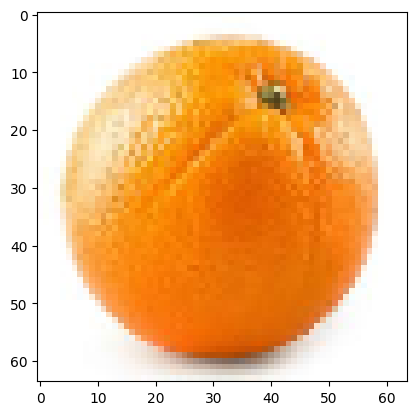

In [58]:
img= plt.imread('Datasets/fruits/sample1.jpg')

img_resized = cv2.resize(img,(64,64))
plt.imshow(img_resized)

img_resized = img_resized.reshape(-1,64,64,3)

print("Prediction : ",model.predict(img_resized)[0][0])

1/1 [==============================] - 0s 47ms/step
Prediction :  0.0


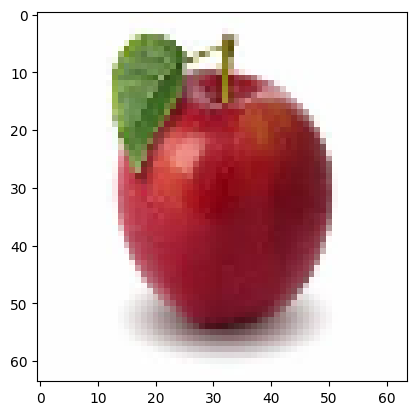

In [57]:
img= plt.imread('Datasets/fruits/sample2.jpg')

img_resized = cv2.resize(img,(64,64))
plt.imshow(img_resized)

img_resized = img_resized.reshape(-1,64,64,3)

print("Prediction : ",model.predict(img_resized)[0][0])